# Logistic regression for Cars - Purchase Prediction Analysis

A purchase decision data set, indicating whether or not a client bought a car.
This dataset contains details of 1000 customers who intend to buy a car, considering their annual salaries.

Columns:
* User ID
* Gender
* Age
* Annual Salary
* Purchase Decision (No = 0; Yes = 1)

1. Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

2. Reading CSV File

In [2]:
#load the dataset
data = pd.read_csv('car_data.csv')

3. Data Analysis

In [3]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [12]:
data.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [4]:
# Find missing values
data.isnull().sum()

,0
User ID,0
Gender,0
Age,0
AnnualSalary,0
Purchased,0


In [13]:
data.nunique()

,0
User ID,1000
Gender,2
Age,46
AnnualSalary,247
Purchased,2


In [14]:
data['Purchased'].value_counts()

,count
Purchased,
0,598
1,402


In [17]:
data.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [18]:
data = data.drop(['User ID'],axis=1)

In [19]:
data.columns

Index(['Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [20]:
data.duplicated().sum()

57

In [21]:
data = data.drop_duplicates()
data.duplicated().sum()

0

# Generating Plots and Graphs

<Axes: ylabel='count'>

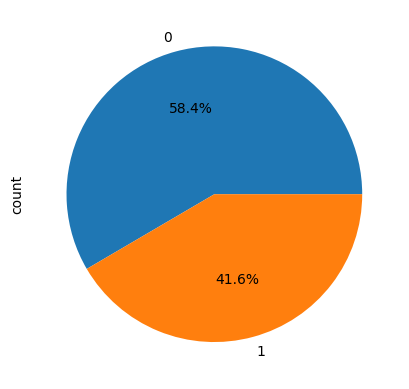

In [25]:
#pie chart to visualize the distribution of 'Purchase Decisions'
data["Purchased"].value_counts().plot(kind="pie", autopct="%1.1f%%")

Purchased
0    551
1    392
Name: count, dtype: int64


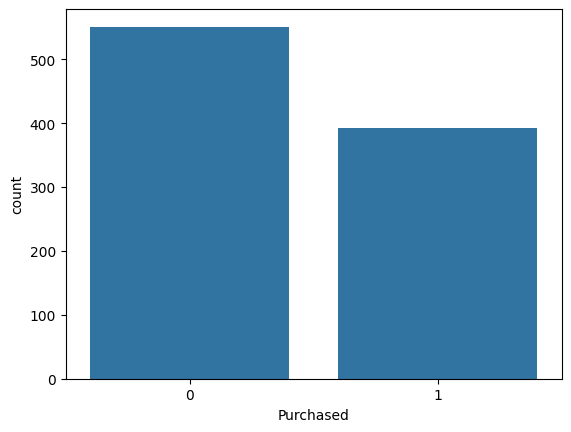

In [24]:
#check if data is balanced or not as we previously

# Check for class imbalance
# print(data['sustainability'].value_counts()) # The original line causing the error
print(data['Purchased'].value_counts())  # Changed to 'Purchased' column which exists
# Visualize class distribution
sns.countplot(x='Purchased', data=data) # Changed to 'Purchased' column which exists
plt.show()

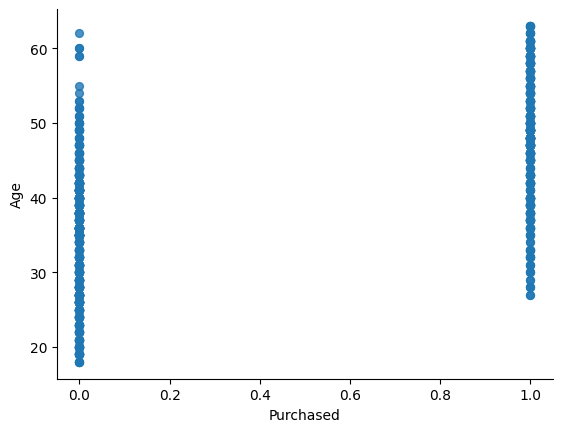

In [26]:
#scatter plot to visualize the relationship between the 'Purchased' and 'Age'
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Purchased', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0, 0.5, 'Frequency')

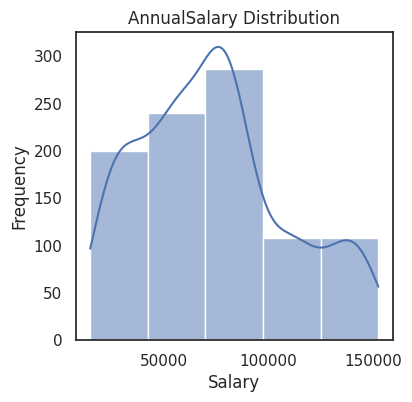

In [32]:
#visualize the distribution of AnnualSalary
sns.set(style="white")

# Histogram for Insulin
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='AnnualSalary',bins=5, kde=True)
plt.title('AnnualSalary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')

<Axes: >

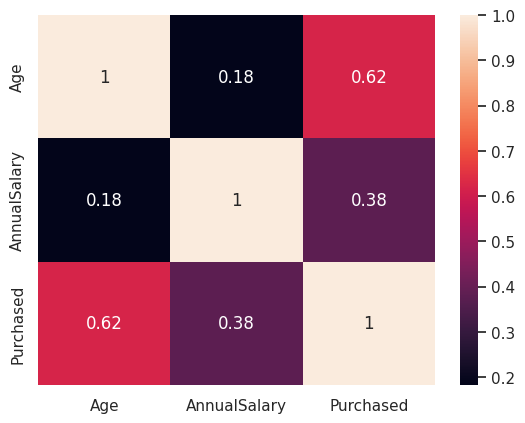

In [35]:
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix for numerical features
sns.heatmap(data = numerical_data.corr(), annot=True)

4. Data Preprocessing

In [39]:
print(data.isnull().sum())

Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64


In [40]:
x = data[['Gender', 'Age', 'AnnualSalary']]
y = data['Purchased']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 42)

In [64]:
x_train

,Age,AnnualSalary,Gender_Male
283,58,75500,True
12,32,72500,False
183,56,106500,False
376,61,35500,True
440,47,107000,False
...,...,...,...
107,47,29500,True
275,35,116500,True
906,33,60000,False
446,26,32000,True


In [65]:
y_train

,Purchased
283,1
12,0
183,1
376,1
440,1
...,...
107,1
275,0
906,0
446,0


In [47]:
x_train.head()

,Gender,Age,AnnualSalary
283,Male,58,75500
12,Female,32,72500
183,Female,56,106500
376,Male,61,35500
440,Female,47,107000


5. Implementing Logistic Regression Model

In [51]:
# Convert 'Gender' column to numerical representation using one-hot encoding
x_train = pd.get_dummies(x_train, columns=['Gender'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['Gender'], drop_first=True)
# Now, you should be able to fit the model without the error:
reg.fit(x_train, y_train)

LogisticRegression()

6. Predictions

In [54]:
y_pred=reg.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("The Accuracy of Model for Prediction is : ",accuracy*100)

The Accuracy of Model for Prediction is :  82.01058201058201


In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix of Model is : ",cm)

The Confusion Matrix of Model is :  [[195  26]
 [ 42 115]]


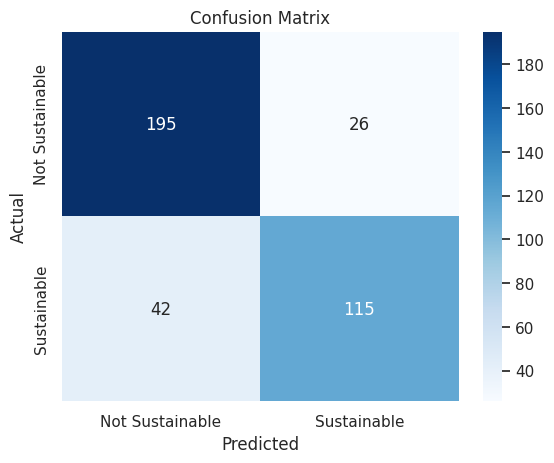

In [58]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sustainable','Sustainable'],
            yticklabels=['Not Sustainable','Sustainable'])


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [61]:
#feature importance
# Assuming 'reg' is your LogisticRegression object
reg = LogisticRegression()
reg.fit(x_train, y_train)  # Fit the model before accessing coef_

# Now, you can access the coefficients and create the DataFrame
coefficients = pd.DataFrame(reg.coef_, columns=x_train.columns, index=['Coefficient']).T
print(coefficients)

              Coefficient
Age              0.218598
AnnualSalary     0.000035
Gender_Male      0.468350


In [62]:
import joblib
#save the model to a file
joblib.dump(model, 'lromodel_sustainable.pkl')

['lromodel_sustainable.pkl']

The Accuracy of Model for Prediction is :  81.5
The Confusion Matrix of Model is :  [[214  17]
 [ 57 112]]


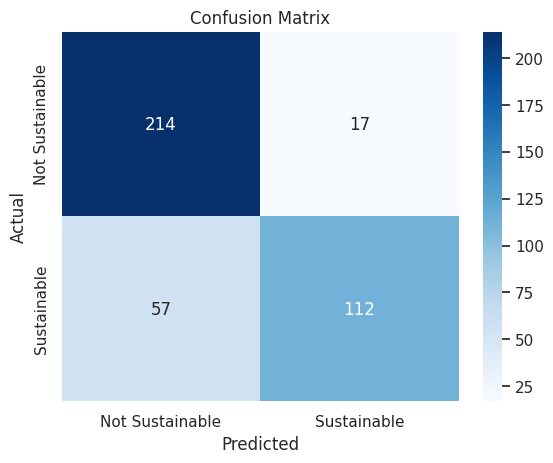

              Coefficient
Age              0.209409
AnnualSalary     0.000036
Gender_Male      0.533051
Predicted sustainability: Not Sustainable


In [67]:
# 1. Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Reading CSV File
data = pd.read_csv('car_data.csv')

# 3. Data Analysis
# (Data analysis code remains unchanged)

# 4. Data Preprocessing
x = data[['Gender', 'Age', 'AnnualSalary']]
y = data['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Convert 'Gender' column to numerical representation using one-hot encoding
x_train = pd.get_dummies(x_train, columns=['Gender'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['Gender'], drop_first=True)

# 5. Implementing Logistic Regression Model
reg = LogisticRegression()  # Initialize the LogisticRegression object
reg.fit(x_train, y_train)  # Fit the model to the training data

# 6. Predictions
y_pred = reg.predict(x_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("The Accuracy of Model for Prediction is : ", accuracy * 100)

cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix of Model is : ", cm)

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sustainable', 'Sustainable'],
            yticklabels=['Not Sustainable', 'Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
coefficients = pd.DataFrame(reg.coef_, columns=x_train.columns, index=['Coefficient']).T
print(coefficients)

# Saving the model
import joblib
model = reg  # Assign the fitted 'reg' object to 'model' for saving
joblib.dump(model, 'lromodel_sustainable.pkl')

# Making a prediction on new data
new_data_point = np.array([[10, 0.8, 0.7]])
new_data_point = new_data_point.reshape(1, -1)

# Assuming x_train has columns 'Age', 'AnnualSalary', and 'Gender_Male'
new_data_point = pd.DataFrame(new_data_point, columns=['Age', 'AnnualSalary', 'Gender_Male'])

prediction = model.predict(new_data_point)  # Use the loaded 'model' for prediction

if prediction[0] == 0:
    print("Predicted sustainability: Not Sustainable")
else:
    print("Predicted sustainability: Sustainable")

In [68]:
new_data = np.array([[22.49,45.33,52.33]])
predictions = model.predict(new_data)
print(predictions)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
